实验一：线性回归——波士顿房价的预测
实验学时：4学时
实验平台：Python相关平台

【实验目标】
1. 理解回归问题。
2. 掌握线性回归的原理和实现方法。
3. 掌握梯度下降方法和标准方程方法。

【实验内容】
使用sklearn自带的波士顿房价数据集来预测线性模型，然后用该线性模型来测算房价。具体包括以下参考步骤：

（a)导入sklearn包自带的波士顿房价数据集，对数据集进行必要的处理，并将数据集分为训练集和验证集。

（b)构建代价函数。

（c)分别使用梯度下降法和标准方程法求取代价函数最小值时的参数。

（d)利用求取的线性模型对测试数据进行预测。

（e)选取合适的评价指标对预测结果进行评价。

（f)对梯度下降方法和标准方程法进行比较、分析和总结。

【实验要求】
1. 针对实验内容，梳理实验步骤、划分实验模块。
2. 分析每个实验模块，完成对应模块的代码编写（含注释）和调试。
3. 显示实验结果，并对实验结果进行对比分析，最后总结实验结果。
4. 以实验笔记的形式撰写实验报告，可以包括实验内容，实验平台，采用的算法原理（简要介绍），采用的数据集，采用的评价指标，实验步骤，实验结果展示，实验比较与分析，实验总结，以及心得体会等等。
 


### 导入基本的数据分析的package

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
# 使输出的图像以更高清的方式显示
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
# plt.style.use('ggplot') 
plt.style.use("fivethirtyeight")
# Pandas中只显示3位小数
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

from sklearn import datasets  # 导入数据集
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
np.random.seed(42)
import warnings

In [2]:
data=pd.read_csv("boston_house_prices.csv")
y=data['MEDV']
X=data.drop('MEDV',axis=1)
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))


Boston housing dataset has 506 data points with 14 variables each.


In [3]:
df = pd.DataFrame(X)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,396.900,5.330


In [4]:
df["MEDV"] = y
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,396.900,5.330,36.200


In [5]:
df.columns
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.shape

(506, 14)

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 查看统计信息

In [9]:
corr=df.corr()

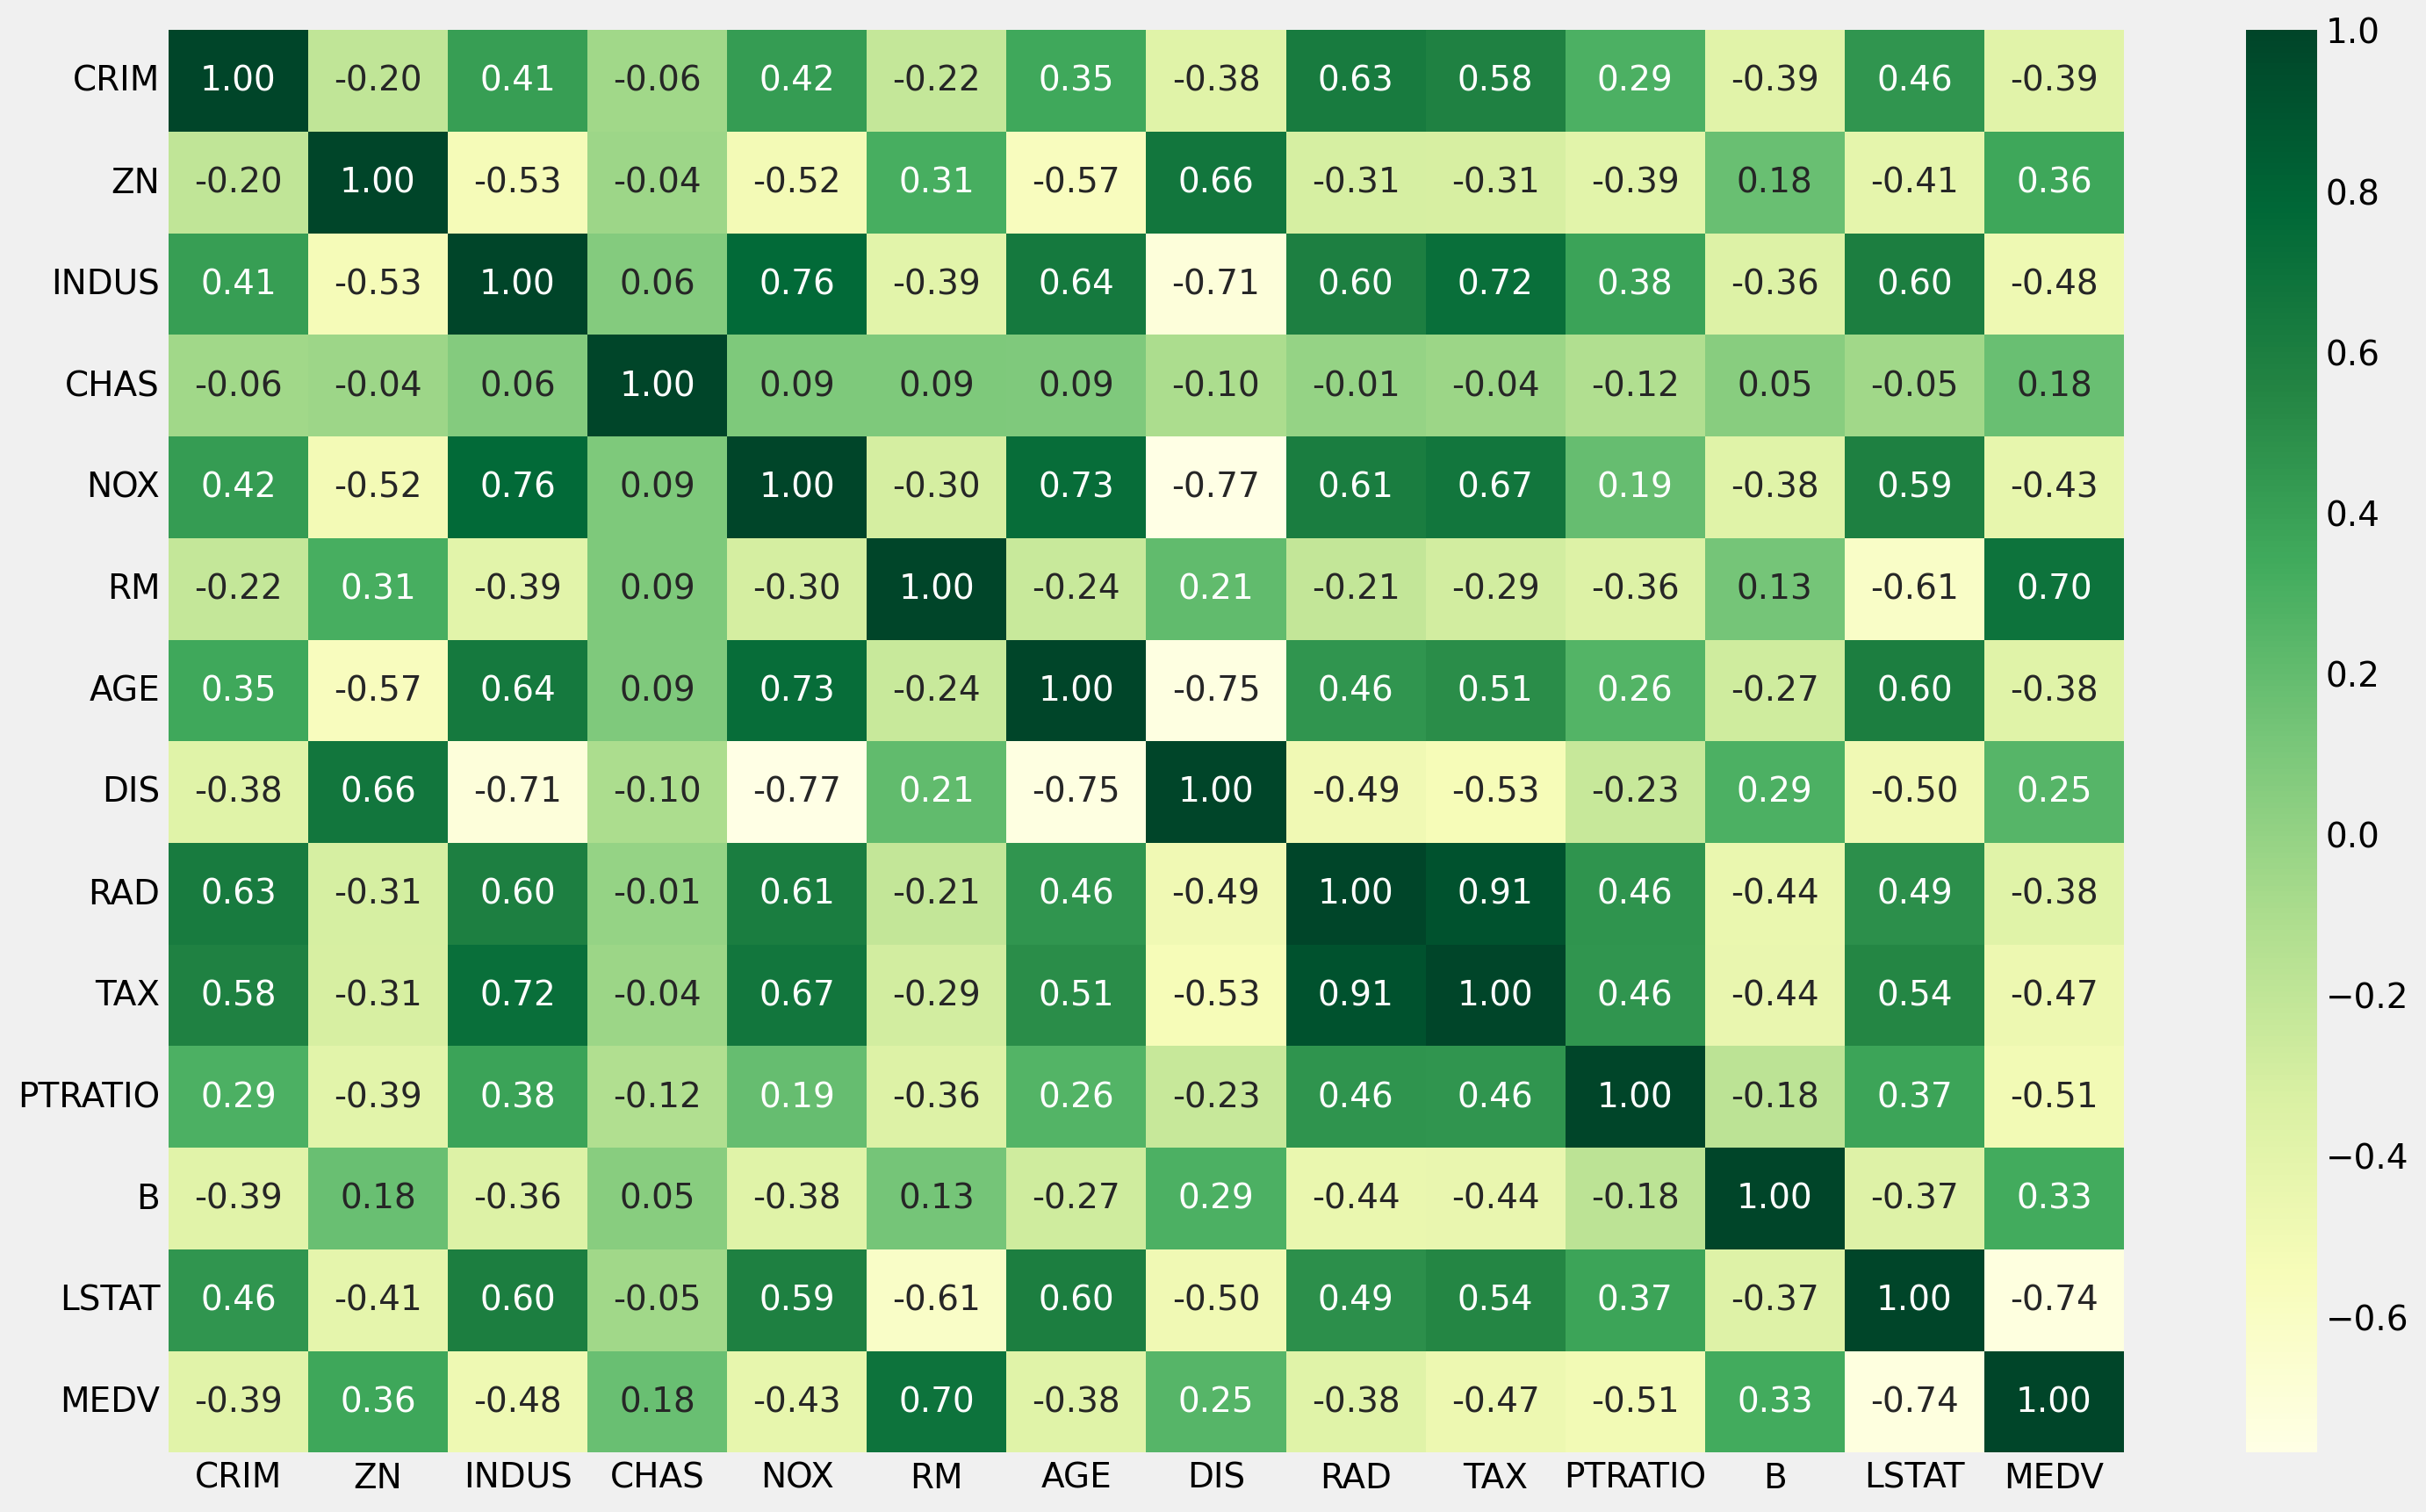

In [10]:
plt.figure(figsize=(16,10))

sns.heatmap(corr,annot=True,fmt='.2f',cmap='YlGn')

plt.show()

查看查看每个特征和目标变量MEDV之间的相关系数,

In [11]:
corr["MEDV"].sort_values()


LSTAT     -0.738
PTRATIO   -0.508
INDUS     -0.484
TAX       -0.469
NOX       -0.427
CRIM      -0.388
RAD       -0.382
AGE       -0.377
CHAS       0.175
DIS        0.250
B          0.333
ZN         0.360
RM         0.695
MEDV       1.000
Name: MEDV, dtype: float64

对相关系数加绝对值，取相关性最高的三个feature,分别是:LSTAT(-0.738),RM(+0.695),PTRATIO(-0.508)

### 数据集划分

划分给定的数据集，比例是8：2



In [12]:
X = df.drop("MEDV",axis=1)
y = df[["MEDV"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=123)


In [13]:
print(f"训练集X的shape:{X_train.shape},训练集y的shape:{y_train.shape},测试集X的shape:{X_test.shape},测试集X的shape:{y_test.shape},")

训练集X的shape:(404, 13),训练集y的shape:(404, 1),测试集X的shape:(102, 13),测试集X的shape:(102, 1),


### 线性回归

使用sklearn 自带的 LinearRegression 进行线性回归

In [14]:
def sklearn_regression(X_train,y_train):
    from sklearn.linear_model import LinearRegression
    # 模型实例化
    model = LinearRegression()
    # 拟合过程
    model.fit(X_train, y_train)
    # 得到回归系数
    coef = model.coef_  # 13个回归系数
    return coef,model

自主编写多元线性回归程序,定义$L_2-norm$作为$loss function$,简单起见,使用梯度下降算法

使得$f(x_1, \ldots ,x_{13})=\theta_0+\theta_1 x_1+ \cdots +\theta_{13}x_{13}$

In [15]:
# 定义线性回归模型
class My_regression:
    def __init__(self, learning_rate, n_iterations):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def regression(self, X, y):
        # 初始化变量
        # m,n是X的行列数,theta是权重,loss_history用来存储损失
        m, n = X.shape
        self.theta = np.random.rand(n).reshape(-1,1)
        self.loss_history = []


        for _ in range(self.n_iterations):
            # 计算预测值
            y_pred = (np.dot(X, self.theta)).reshape(-1, 1)
            # 计算损失
            loss = 0.5 * (1/m) * np.sum((y_pred - y) ** 2)
            self.loss_history.append(loss)
            # 计算梯度
            gradient = (1/m) * np.dot(X.T, (y_pred - y))
            # 更新参数
            self.theta = self.theta - self.learning_rate * gradient
    
    def predict(self, X):
        return np.dot(X, self.theta)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        y_mean = np.mean(y)  # 真实值y的平均值
        y_mean = np.full_like(y, y_mean)  # 将 y_mean 扩展为与 y 具有相同形状的向量
        
        ssr = np.sum((y_pred - y_mean) ** 2)
        sst = np.sum((y - y_mean) ** 2)
        
        r_squared = 1 - (ssr / sst)
        return r_squared
    
    def coef(self):
        return self.theta



预测房价函数

In [16]:
def regression_predict(model,X_test,y_test):
    predict = model.predict(X_test)
    print("预测值:",predict[0:10])
    print("真实值:",y_test[0:10])
    score=model.score(X_test, y_test)
    RMSE=np.sqrt(mean_squared_error(y_test, predict))
    return score,RMSE,predict

准备数据，分别将训练集数据通过sklearn和自己的线性回归模型进行训练，然后进行预测

In [17]:
# 使用sklearn进行训练
X_train1, y_train1 = np.array(X_train), np.array(y_train)
X_train1 = np.column_stack((X_train1,np.ones(X_train1.shape[0]),))

coef1,model1=sklearn_regression(X_train1,y_train1)
# 数据准备
X_train2, y_train2 = np.array(X_train), np.array(y_train)
# 添加偏置项
X_train2 = np.column_stack((X_train2,np.ones(X_train2.shape[0]),))
# 使用自己的线性回归模型,学习率设置为0.0000062,迭代10000次
model2 = My_regression(learning_rate=0.0000062, n_iterations=10000)
# 训练模型
model2.regression(X_train2, y_train2)
# 得到回归系数
coef2=model2.coef()

In [18]:
print(coef1)
print(coef2)

[[-9.87931696e-02  4.75027102e-02  6.69491841e-02  1.26954150e+00
  -1.54697747e+01  4.31968412e+00 -9.80167937e-04 -1.36597953e+00
   2.84521838e-01 -1.27533606e-02 -9.13487599e-01  7.22553507e-03
  -5.43790245e-01  0.00000000e+00]]
[[-0.16873229]
 [ 0.1121586 ]
 [ 0.25209957]
 [ 0.60596195]
 [ 0.16330884]
 [ 0.51224327]
 [ 0.10149319]
 [ 0.79700158]
 [ 0.43702057]
 [-0.02031917]
 [ 0.1049098 ]
 [ 0.03788049]
 [-0.50428186]
 [ 0.23661498]]


In [19]:
X_test_augmented = np.hstack((X_test,np.ones((X_test.shape[0], 1))))

score1,RMSE1,predict1=regression_predict(model1,X_test_augmented,np.array(y_test))

score2,RMSE2,predict2=regression_predict(model2,X_test_augmented,np.array(y_test))

print(f"score={score1},RMSE={RMSE1},score={score2},RMSE={RMSE2}")

预测值: [[16.00330023]
 [27.79447431]
 [39.26769478]
 [18.32613556]
 [30.45487494]
 [37.67724152]
 [25.28488162]
 [10.22712629]
 [14.82537224]
 [31.99311717]]
真实值: [[15. ]
 [26.6]
 [45.4]
 [20.8]
 [34.9]
 [21.9]
 [28.7]
 [ 7.2]
 [20. ]
 [32.2]]
预测值: [[ 4.56862457]
 [23.85959929]
 [29.81401803]
 [19.21481973]
 [30.20974505]
 [29.20392428]
 [26.00307758]
 [ 2.22436055]
 [20.95567198]
 [29.95393955]]
真实值: [[15. ]
 [26.6]
 [45.4]
 [20.8]
 [34.9]
 [21.9]
 [28.7]
 [ 7.2]
 [20. ]
 [32.2]]
score=0.6592466510354099,RMSE=5.30965966503217,score=0.5386977600277816,RMSE=6.99404036793468


In [20]:
le_df = pd.DataFrame()
le_df["name"] = X.columns.tolist()
coef1=coef1.reshape(-1,1)
le_df["coef1"] = coef1[0:13].reshape(-1,1)
le_df["coef2"] = coef2[0:13]

print(le_df)

       name   coef1  coef2
0      CRIM  -0.099 -0.169
1        ZN   0.048  0.112
2     INDUS   0.067  0.252
3      CHAS   1.270  0.606
4       NOX -15.470  0.163
5        RM   4.320  0.512
6       AGE  -0.001  0.101
7       DIS  -1.366  0.797
8       RAD   0.285  0.437
9       TAX  -0.013 -0.020
10  PTRATIO  -0.913  0.105
11        B   0.007  0.038
12    LSTAT  -0.544 -0.504


In [24]:
test_pre = pd.DataFrame({"test": y_test["MEDV"].tolist(),
                         "predict1": predict1.flatten(),
                         "predict2": predict2.flatten(),
                        })

print(test_pre)

      test  predict1  predict2
0   15.000    16.003     4.569
1   26.600    27.794    23.860
2   45.400    39.268    29.814
3   20.800    18.326    19.215
4   34.900    30.455    30.210
..     ...       ...       ...
97  31.500    31.251    21.621
98  23.300    26.610    25.578
99  33.300    36.456    31.159
100 17.500    16.524    21.229
101 19.100    16.627    19.713

[102 rows x 3 columns]


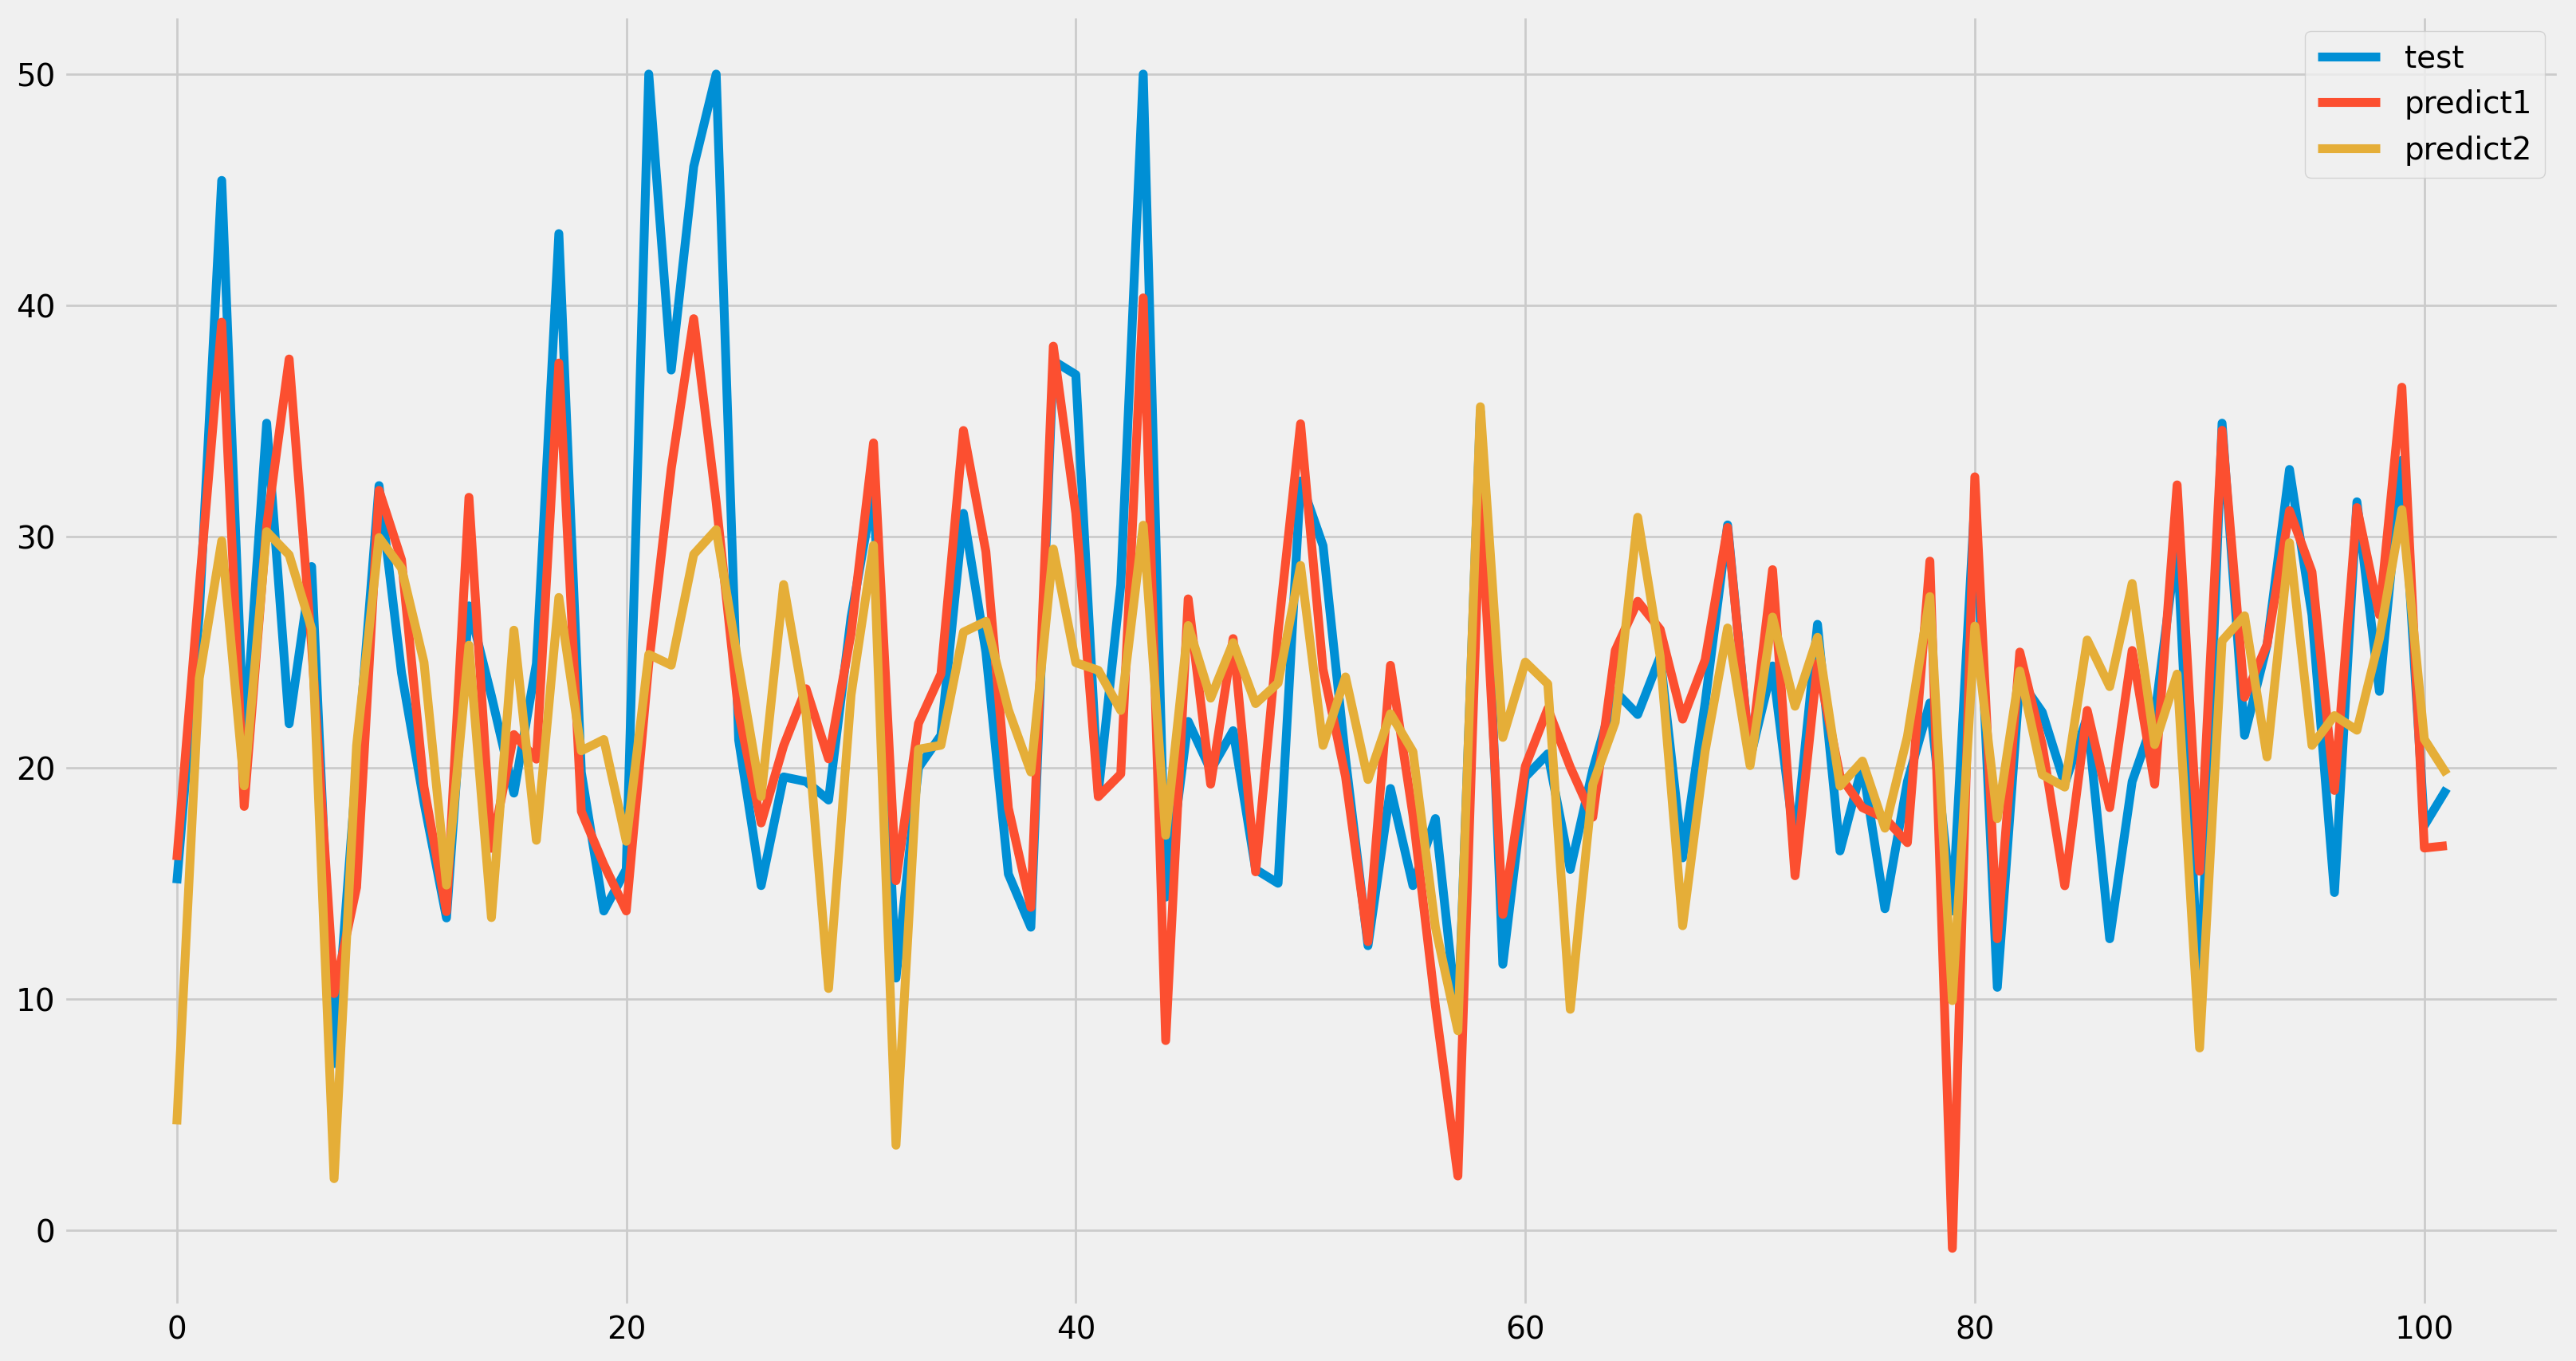

In [25]:
test_pre.plot(figsize=(18,10))
plt.show()

In [27]:
print(len(test_pre.query("test>predict1"))/len(test_pre))
print(len(test_pre.query("test>predict2"))/len(test_pre))

0.4215686274509804
0.5


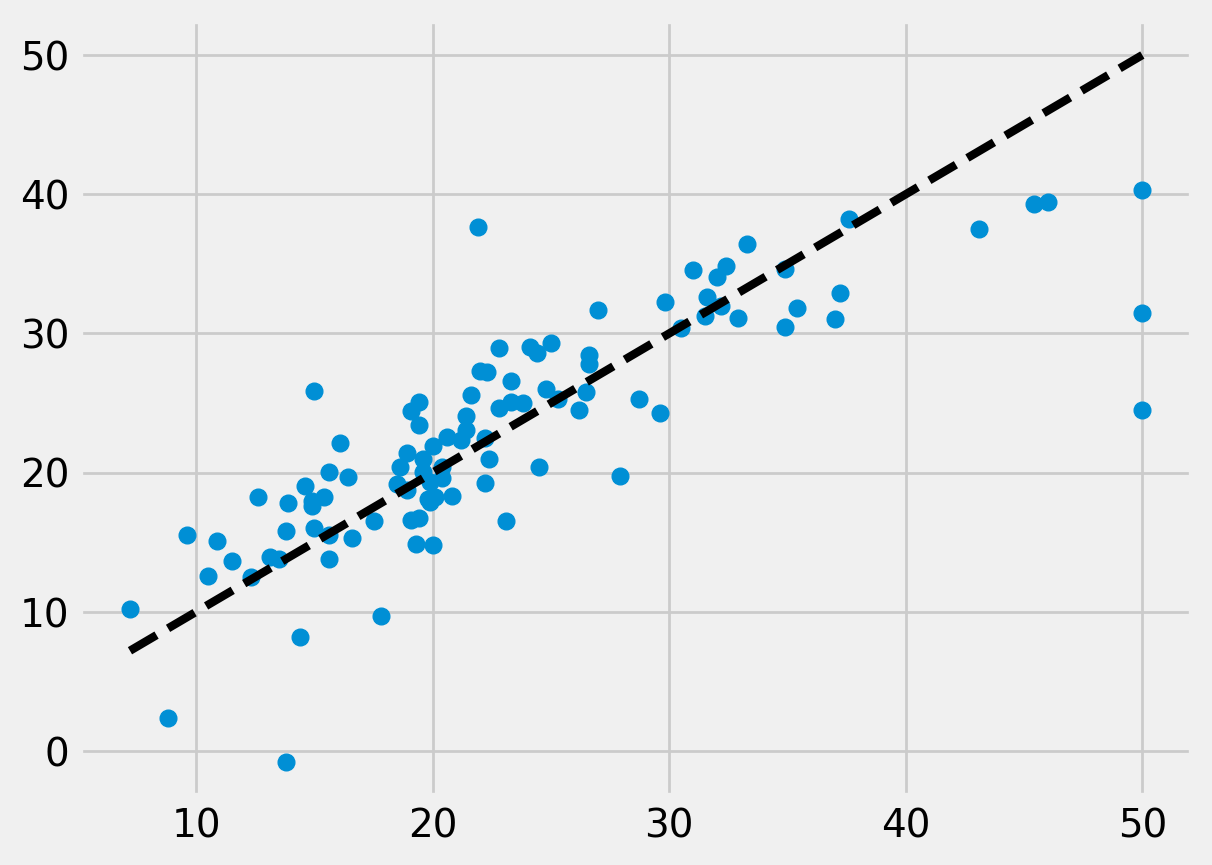

In [29]:
plt.scatter(y_test, predict1, label="test")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--',
         lw=3,
         label="predict"
        )

plt.show()

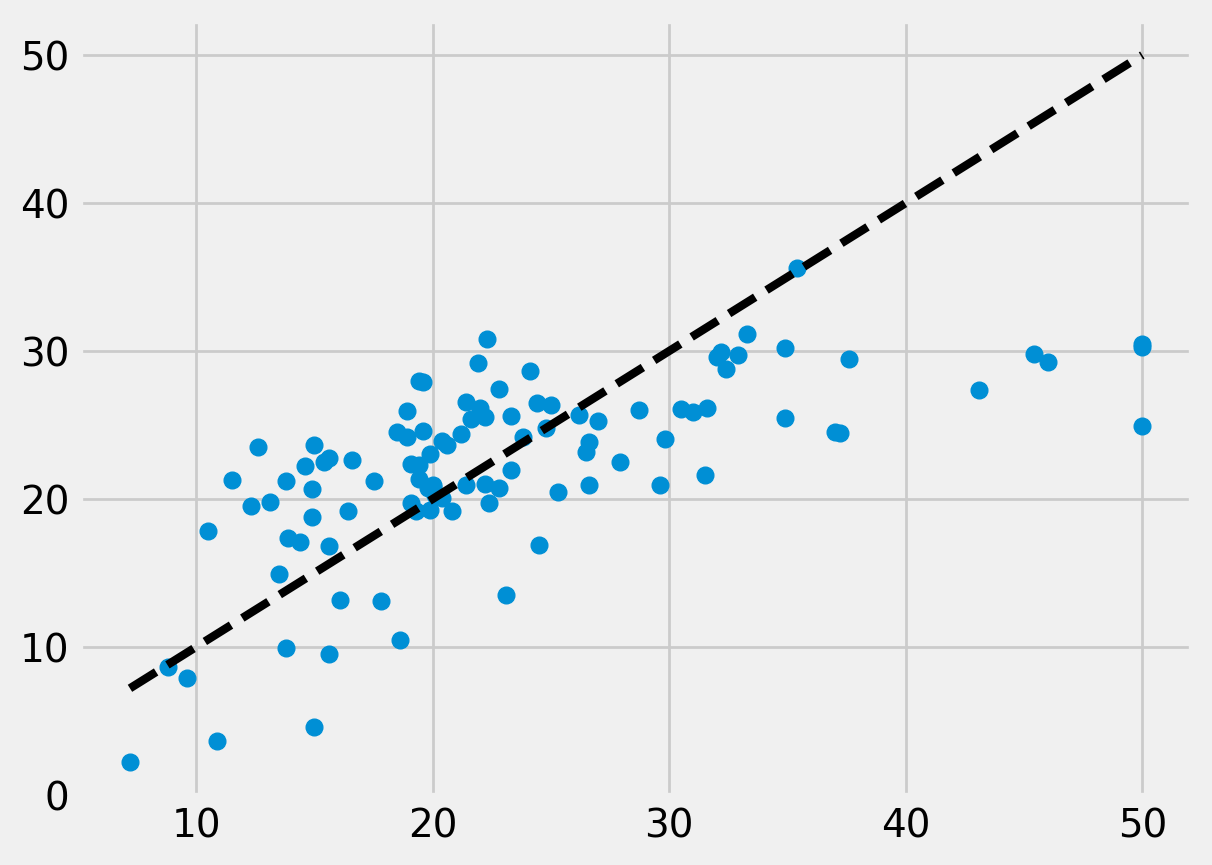

In [30]:
plt.scatter(y_test, predict2, label="test")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--',
         lw=3,
         label="predict"
        )

plt.show()